In [4]:
#Importing the libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, StratifiedKFold, StratifiedShuffleSplit, KFold
from statistics import mean, stdev

# Exploring dataset

In [5]:
# Loading the dataset
df = pd.read_csv('/Users/daisysekar/Downloads/data.csv')

In [6]:
# It prints the top 5 dataset
df.head()

,android.permission.GET_ACCOUNTS,com.sonyericsson.home.permission.BROADCAST_BADGE,android.permission.READ_PROFILE,android.permission.MANAGE_ACCOUNTS,android.permission.WRITE_SYNC_SETTINGS,android.permission.READ_EXTERNAL_STORAGE,android.permission.RECEIVE_SMS,com.android.launcher.permission.READ_SETTINGS,android.permission.WRITE_SETTINGS,com.google.android.providers.gsf.permission.READ_GSERVICES,...,com.android.launcher.permission.UNINSTALL_SHORTCUT,com.sec.android.iap.permission.BILLING,com.htc.launcher.permission.UPDATE_SHORTCUT,com.sec.android.provider.badge.permission.WRITE,android.permission.ACCESS_NETWORK_STATE,com.google.android.finsky.permission.BIND_GET_INSTALL_REFERRER_SERVICE,com.huawei.android.launcher.permission.READ_SETTINGS,android.permission.READ_SMS,android.permission.PROCESS_INCOMING_CALLS,Result
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


In [7]:
# Geting number of rows and columns
df.shape

(29332, 87)

In [8]:
# Displays information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29332 entries, 0 to 29331
Data columns (total 87 columns):
 #   Column                                                                         Non-Null Count  Dtype
---  ------                                                                         --------------  -----
 0   android.permission.GET_ACCOUNTS                                                29332 non-null  int64
 1   com.sonyericsson.home.permission.BROADCAST_BADGE                               29332 non-null  int64
 2   android.permission.READ_PROFILE                                                29332 non-null  int64
 3   android.permission.MANAGE_ACCOUNTS                                             29332 non-null  int64
 4   android.permission.WRITE_SYNC_SETTINGS                                         29332 non-null  int64
 5   android.permission.READ_EXTERNAL_STORAGE                                       29332 non-null  int64
 6   android.permission.RECEIVE_SMS        

In [9]:
# Checking for null value in the dataset
df.isnull().sum()

android.permission.GET_ACCOUNTS                                           0
com.sonyericsson.home.permission.BROADCAST_BADGE                          0
android.permission.READ_PROFILE                                           0
android.permission.MANAGE_ACCOUNTS                                        0
android.permission.WRITE_SYNC_SETTINGS                                    0
                                                                         ..
com.google.android.finsky.permission.BIND_GET_INSTALL_REFERRER_SERVICE    0
com.huawei.android.launcher.permission.READ_SETTINGS                      0
android.permission.READ_SMS                                               0
android.permission.PROCESS_INCOMING_CALLS                                 0
Result                                                                    0
Length: 87, dtype: int64

In [10]:
# displays description about the data
df.describe()

,android.permission.GET_ACCOUNTS,com.sonyericsson.home.permission.BROADCAST_BADGE,android.permission.READ_PROFILE,android.permission.MANAGE_ACCOUNTS,android.permission.WRITE_SYNC_SETTINGS,android.permission.READ_EXTERNAL_STORAGE,android.permission.RECEIVE_SMS,com.android.launcher.permission.READ_SETTINGS,android.permission.WRITE_SETTINGS,com.google.android.providers.gsf.permission.READ_GSERVICES,...,com.android.launcher.permission.UNINSTALL_SHORTCUT,com.sec.android.iap.permission.BILLING,com.htc.launcher.permission.UPDATE_SHORTCUT,com.sec.android.provider.badge.permission.WRITE,android.permission.ACCESS_NETWORK_STATE,com.google.android.finsky.permission.BIND_GET_INSTALL_REFERRER_SERVICE,com.huawei.android.launcher.permission.READ_SETTINGS,android.permission.READ_SMS,android.permission.PROCESS_INCOMING_CALLS,Result
count,29332.000000,29332.000000,29332.000000,29332.000000,29332.000000,29332.000000,29332.000000,29332.000000,29332.00000,29332.000000,...,29332.000000,29332.000000,29332.000000,29332.000000,29332.000000,29332.000000,29332.000000,29332.000000,29332.000000,29332.000000
mean,0.226033,0.034263,0.045888,0.013603,0.005762,0.171690,0.060071,0.014114,0.11080,0.043741,...,0.029660,0.003887,0.033445,0.034297,0.949032,0.023728,0.023387,0.051718,0.003648,0.501159
std,0.418268,0.181907,0.209247,0.115837,0.075688,0.377117,0.237622,0.117964,0.31389,0.204521,...,0.169652,0.062222,0.179798,0.181994,0.219937,0.152204,0.151133,0.221461,0.060289,0.500007
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
# checking the classification in target variable
df['Result'].value_counts()

1    14700
0    14632
Name: Result, dtype: int64

/Users/daisysekar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


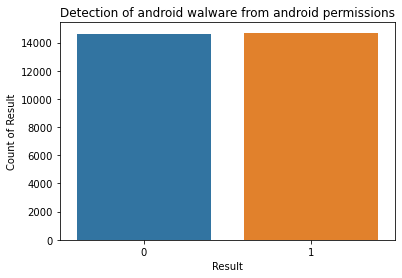

In [12]:
# bar plot of target variable
sns.countplot(df['Result'])
plt.xlabel("Result")
plt.ylabel("Count of Result")
plt.title("Detection of android walware from android permissions")
plt.show()

In [13]:
# Displays the column name
df.columns

Index(['android.permission.GET_ACCOUNTS',
       'com.sonyericsson.home.permission.BROADCAST_BADGE',
       'android.permission.READ_PROFILE', 'android.permission.MANAGE_ACCOUNTS',
       'android.permission.WRITE_SYNC_SETTINGS',
       'android.permission.READ_EXTERNAL_STORAGE',
       'android.permission.RECEIVE_SMS',
       'com.android.launcher.permission.READ_SETTINGS',
       'android.permission.WRITE_SETTINGS',
       'com.google.android.providers.gsf.permission.READ_GSERVICES',
       'android.permission.DOWNLOAD_WITHOUT_NOTIFICATION',
       'android.permission.GET_TASKS',
       'android.permission.WRITE_EXTERNAL_STORAGE',
       'android.permission.RECORD_AUDIO',
       'com.huawei.android.launcher.permission.CHANGE_BADGE',
       'com.oppo.launcher.permission.READ_SETTINGS',
       'android.permission.CHANGE_NETWORK_STATE',
       'com.android.launcher.permission.INSTALL_SHORTCUT',
       'android.permission.android.permission.READ_PHONE_STATE',
       'android.permission.C

In [14]:
# Stratified cross validation

# Copying all the rows and column values into X except the target variable
X = df[['android.permission.GET_ACCOUNTS',
       'com.sonyericsson.home.permission.BROADCAST_BADGE',
       'android.permission.READ_PROFILE', 'android.permission.MANAGE_ACCOUNTS',
       'android.permission.WRITE_SYNC_SETTINGS',
       'android.permission.READ_EXTERNAL_STORAGE',
       'android.permission.RECEIVE_SMS',
       'com.android.launcher.permission.READ_SETTINGS',
       'android.permission.WRITE_SETTINGS',
       'com.google.android.providers.gsf.permission.READ_GSERVICES',
       'android.permission.DOWNLOAD_WITHOUT_NOTIFICATION',
       'android.permission.GET_TASKS',
       'android.permission.WRITE_EXTERNAL_STORAGE',
       'android.permission.RECORD_AUDIO',
       'com.huawei.android.launcher.permission.CHANGE_BADGE',
       'com.oppo.launcher.permission.READ_SETTINGS',
       'android.permission.CHANGE_NETWORK_STATE',
       'com.android.launcher.permission.INSTALL_SHORTCUT',
       'android.permission.android.permission.READ_PHONE_STATE',
       'android.permission.CALL_PHONE', 'android.permission.WRITE_CONTACTS',
       'android.permission.READ_PHONE_STATE',
       'com.samsung.android.providers.context.permission.WRITE_USE_APP_FEATURE_SURVEY',
       'android.permission.MODIFY_AUDIO_SETTINGS',
       'android.permission.ACCESS_LOCATION_EXTRA_COMMANDS',
       'android.permission.INTERNET',
       'android.permission.MOUNT_UNMOUNT_FILESYSTEMS',
       'com.majeur.launcher.permission.UPDATE_BADGE',
       'android.permission.AUTHENTICATE_ACCOUNTS',
       'com.htc.launcher.permission.READ_SETTINGS',
       'android.permission.ACCESS_WIFI_STATE', 'android.permission.FLASHLIGHT',
       'android.permission.READ_APP_BADGE',
       'android.permission.USE_CREDENTIALS',
       'android.permission.CHANGE_CONFIGURATION',
       'android.permission.READ_SYNC_SETTINGS',
       'android.permission.BROADCAST_STICKY',
       'com.anddoes.launcher.permission.UPDATE_COUNT',
       'com.android.alarm.permission.SET_ALARM',
       'com.google.android.c2dm.permission.RECEIVE',
       'android.permission.KILL_BACKGROUND_PROCESSES',
       'com.sonymobile.home.permission.PROVIDER_INSERT_BADGE',
       'com.sec.android.provider.badge.permission.READ',
       'android.permission.WRITE_CALENDAR', 'android.permission.SEND_SMS',
       'com.huawei.android.launcher.permission.WRITE_SETTINGS',
       'android.permission.REQUEST_INSTALL_PACKAGES',
       'android.permission.SET_WALLPAPER_HINTS',
       'android.permission.SET_WALLPAPER',
       'com.oppo.launcher.permission.WRITE_SETTINGS',
       'android.permission.RESTART_PACKAGES',
       'me.everything.badger.permission.BADGE_COUNT_WRITE',
       'android.permission.ACCESS_MOCK_LOCATION',
       'android.permission.ACCESS_COARSE_LOCATION',
       'android.permission.READ_LOGS',
       'com.google.android.gms.permission.ACTIVITY_RECOGNITION',
       'com.amazon.device.messaging.permission.RECEIVE',
       'android.permission.SYSTEM_ALERT_WINDOW',
       'android.permission.DISABLE_KEYGUARD',
       'android.permission.USE_FINGERPRINT',
       'me.everything.badger.permission.BADGE_COUNT_READ',
       'android.permission.CHANGE_WIFI_STATE',
       'android.permission.READ_CONTACTS', 'com.android.vending.BILLING',
       'android.permission.READ_CALENDAR',
       'android.permission.RECEIVE_BOOT_COMPLETED',
       'android.permission.WAKE_LOCK',
       'android.permission.ACCESS_FINE_LOCATION',
       'android.permission.BLUETOOTH', 'android.permission.CAMERA',
       'com.android.vending.CHECK_LICENSE',
       'android.permission.FOREGROUND_SERVICE',
       'android.permission.BLUETOOTH_ADMIN', 'android.permission.VIBRATE',
       'android.permission.NFC', 'android.permission.RECEIVE_USER_PRESENT',
       'android.permission.CLEAR_APP_CACHE',
       'com.android.launcher.permission.UNINSTALL_SHORTCUT',
       'com.sec.android.iap.permission.BILLING',
       'com.htc.launcher.permission.UPDATE_SHORTCUT',
       'com.sec.android.provider.badge.permission.WRITE',
       'android.permission.ACCESS_NETWORK_STATE',
       'com.google.android.finsky.permission.BIND_GET_INSTALL_REFERRER_SERVICE',
       'com.huawei.android.launcher.permission.READ_SETTINGS',
       'android.permission.READ_SMS',
       'android.permission.PROCESS_INCOMING_CALLS']]

In [15]:
# copying target value into Y
Y = df['Result']



#  Perform stratified cross-validation and train a random forest without hyperparameter optimisation

In [16]:
# Splitting the dataset into train and test test using stratifiedKFOLd inbuild class, and train and test uisng random forest classifier 

skf = StratifiedKFold(n_splits=10)
model = RandomForestClassifier()
list_accuracy_stratified = []

def training(train, test, fold_no):
  x_train = train.drop(['Result'],axis=1)
  y_train = train.Result
  x_test = test.drop(['Result'],axis=1)
  y_test = test.Result
  model.fit(x_train, y_train)
  output_acc = model.score(x_test,y_test)
  list_accuracy_stratified.append(output_acc)
  print(' Fold {} accuracy {}'.format(str(fold_no),output_acc))

fold_no = 1
for train_index,test_index in skf.split(X, Y):
  train = df.iloc[train_index,:]
  test = df.iloc[test_index,:]
  training(train, test, fold_no)
  fold_no += 1
accuracy = round(mean(list_accuracy_stratified)* 100,2)
print("Accuracy with stratified cross validation \n",accuracy)

 Fold 1 accuracy 0.9587593728698023
 Fold 2 accuracy 0.9642126789366053
 Fold 3 accuracy 0.9706784861916127
 Fold 4 accuracy 0.9509035117627003
 Fold 5 accuracy 0.9662461643368565
 Fold 6 accuracy 0.9645414251619502
 Fold 7 accuracy 0.9819297647459939
 Fold 8 accuracy 0.9805659734060689
 Fold 9 accuracy 0.9764745993862939
 Fold 10 accuracy 0.80054551653597
Accuracy with stratified cross validation 
 95.15


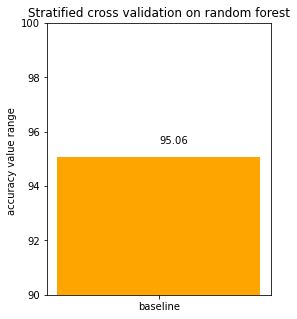

In [81]:
#Graph
plt.figure(figsize=(4,5))
def addtext(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]+0.5,y[i])
plt.ylim(90,100)
y_axis = [accuracy]
x_axis = ["baseline"]
addtext(x_axis,y_axis)
plt.bar(x_axis,y_axis,color=['orange'])
plt.xlabel("")
plt.ylabel("accuracy value range ")
plt.title('Stratified cross validation on random forest')

plt.show()

In [15]:
#print("Classification_report of dataset stratified and train on random forest:\n",classification_report(Y_pred,Y_test))

In [16]:
#Assigning x and y

x = df.iloc[:,:-1]

y = df.iloc[:,-1]



In [17]:
# splitting the dataset into train and test using train_test_split inbuild method (without stratifier)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

# Train a dataset of random forest with hyperparameter optimisation using 10-fold cross validation

In [18]:
#1
# Assigning different values for hyperparameters
clf_1 = RandomForestClassifier()
grid_param_1 = {
    'n_estimators': [300],
    'criterion': ['gini'],
    'bootstrap': [True, False]
}

In [19]:
#  grid search 10-fold cross-validation to tune the hyperparameters of the random forest
grid_search_1 = GridSearchCV(estimator=clf_1,
                     param_grid=grid_param_1,
                     scoring='accuracy',
                     cv=10,
                     n_jobs=-1)

In [20]:
# fit the model
grid_search_1.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'criterion': ['gini'],
                         'n_estimators': [300]},
             scoring='accuracy')

In [21]:
# displays best hyper parameters from the given different values of hyperparameters
best_hyper_parameters = grid_search_1.best_params_
print(best_hyper_parameters)


{'bootstrap': False, 'criterion': 'gini', 'n_estimators': 300}


In [22]:
accuracy_1 = round(grid_search_1.best_score_,2) * 100
#print("Accuracy_1:",accuracy_1)

In [23]:
print("Hyperparameter:\n",best_hyper_parameters)
print("\n\nClassification_report random forest-hyperparameter_1:\n",classification_report(y_test,grid_search_1.best_estimator_.predict(x_test)))

Hyperparameter:
 {'bootstrap': False, 'criterion': 'gini', 'n_estimators': 300}


Classification_report random forest-hyperparameter_1:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      4441
           1       0.98      0.97      0.97      4359

    accuracy                           0.97      8800
   macro avg       0.97      0.97      0.97      8800
weighted avg       0.97      0.97      0.97      8800



In [24]:
#2
# Assigning different values for hyperparameters
clf_1 = RandomForestClassifier()
grid_param_1 = {
    'n_estimators': [400],
    'criterion': [ 'entropy'],
    'bootstrap': [True, False]
}

#  grid search 10-fold cross-validation to tune the hyperparameters of the random forest
grid_search_1 = GridSearchCV(estimator=clf_1,
                     param_grid=grid_param_1,
                     scoring='accuracy',
                     cv=10,
                     n_jobs=-1)

# fit the model
grid_search_1.fit(x_train, y_train)

# displays best hyper parameters from the given different values of hyperparameters
best_hyper_parameters = grid_search_1.best_params_





accuracy_2 = round(grid_search_1.best_score_,2) * 100
print("Accuracy_2:",accuracy_2)

print("Hyperparameter:\n",best_hyper_parameters)
print("\n\nClassification_report random forest-hyperparameter_2:\n",classification_report(y_test,grid_search_1.best_estimator_.predict(x_test)))

/Users/daisysekar/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Accuracy_2: 97.0
Hyperparameter:
 {'bootstrap': False, 'criterion': 'entropy', 'n_estimators': 400}


Classification_report random forest-hyperparameter_2:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      4441
           1       0.98      0.97      0.97      4359

    accuracy                           0.97      8800
   macro avg       0.97      0.97      0.97      8800
weighted avg       0.97      0.97      0.97      8800



In [25]:
#3
# Assigning different values for hyperparameters
clf_1 = RandomForestClassifier()
grid_param_1 = {
    'n_estimators': [ 700, 1000],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}

#  grid search 10-fold cross-validation to tune the hyperparameters of the random forest
grid_search_1 = GridSearchCV(estimator=clf_1,
                     param_grid=grid_param_1,
                     scoring='accuracy',
                     cv=10,
                     n_jobs=-1)

# fit the model
grid_search_1.fit(x_train, y_train)

# displays best hyper parameters from the given different values of hyperparameters
best_hyper_parameters = grid_search_1.best_params_





accuracy_3 = round(grid_search_1.best_score_,2) * 100
print("Accuracy_3:",accuracy_3)
print("Hyperparameter:\n",best_hyper_parameters)
print("\n\nClassification_report random forest-hyperparameter_3:\n",classification_report(y_test,grid_search_1.best_estimator_.predict(x_test)))

/Users/daisysekar/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Accuracy_3: 97.0
Hyperparameter:
 {'bootstrap': False, 'criterion': 'gini', 'n_estimators': 700}


Classification_report random forest-hyperparameter_3:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      4441
           1       0.98      0.97      0.97      4359

    accuracy                           0.97      8800
   macro avg       0.97      0.97      0.97      8800
weighted avg       0.97      0.97      0.97      8800



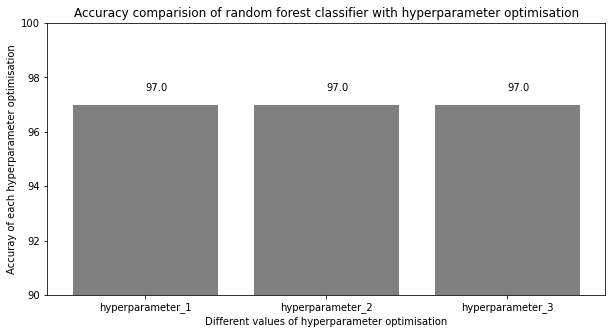

In [26]:
#Graph
plt.figure(figsize=(10,5))
def addtext(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]+0.5,y[i])
plt.ylim(90,100)
y_axis = [accuracy_1,accuracy_2,accuracy_3]
x_axis = ['hyperparameter_1','hyperparameter_2','hyperparameter_3']
addtext(x_axis,y_axis)
plt.bar(x_axis,y_axis,color=['grey', 'grey','grey'])
plt.xlabel("Different values of hyperparameter optimisation")
plt.ylabel("Accuray of each hyperparameter optimisation")
plt.title('Accuracy comparision of random forest classifier with hyperparameter optimisation')

plt.show()

#  Perceptron classifier with hyperparameter optimisation using 10-fold cross validation

In [47]:
#1 
#Assigning different values for hyperparameters
clf_2 = Perceptron()
grid_param_perceptron = {
    'max_iter': [100, 300],
    'shuffle': [True, False],
    'random_state': [0,1]
}

In [48]:
#  grid search 10-fold cross-validation to tune the hyperparameters of the perceptron
grid_search_2 = GridSearchCV(estimator=clf_2,
                     param_grid=grid_param_perceptron,
                     scoring='accuracy',
                     cv=10,
                     n_jobs=-1)

In [49]:
#fit the model
grid_search_2.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=Perceptron(), n_jobs=-1,
             param_grid={'max_iter': [100, 300], 'random_state': [0, 1],
                         'shuffle': [True, False]},
             scoring='accuracy')

In [50]:
# displays best hyper parameters from the given different values of hyperparameters
best_hyper_parameters = grid_search_2.best_params_


In [51]:
accuracy_p1 = round(grid_search_2.best_score_,2) * 100
print("Accuracy_p1:",accuracy_p1)

Accuracy_p1: 94.0


In [52]:
# Displays best_hyper_parameter and classification report
print("Hyperparameter:\n",best_hyper_parameters)
print("\n\nClassification_report perceptron-hyperparameter_1:\n",classification_report(y_test,grid_search_2.best_estimator_.predict(x_test)))

Hyperparameter:
 {'max_iter': 100, 'random_state': 0, 'shuffle': True}


Classification_report perceptron-hyperparameter_1:
               precision    recall  f1-score   support

           0       0.97      0.94      0.96      4441
           1       0.94      0.97      0.96      4359

    accuracy                           0.96      8800
   macro avg       0.96      0.96      0.96      8800
weighted avg       0.96      0.96      0.96      8800



In [55]:
#2 Assigning different values for hyperparameters
grid_param_perceptron = {
    'max_iter': [ 400, 700],
    'shuffle': [True, False],
    'random_state': [5,10,]
}

# grid search 10-fold cross-validation to tune the hyperparameters of the perceptron
grid_search_2 = GridSearchCV(estimator=clf_2,
                     param_grid=grid_param_perceptron,
                     scoring='accuracy',
                     cv=10,
                     n_jobs=-1)
#fit the model

grid_search_2.fit(x_train, y_train)

# displays best hyper parameters from the given different values of hyperparameter
best_hyper_parameters = grid_search_2.best_params_


accuracy_p2 = round(grid_search_2.best_score_,2) * 100
print("Accuracy_p2:",accuracy_p2)
# Displays best_hyper_parameter and classification report
print("Hyperparameter:\n",best_hyper_parameters)
print("\n\nClassification_report perceptron-hyperparameter_2:\n",classification_report(y_test,grid_search_2.best_estimator_.predict(x_test)))

Accuracy_p2: 94.0
Hyperparameter:
 {'max_iter': 400, 'random_state': 10, 'shuffle': True}


Classification_report perceptron-hyperparameter_2:
               precision    recall  f1-score   support

           0       0.85      0.99      0.92      4441
           1       0.99      0.82      0.90      4359

    accuracy                           0.91      8800
   macro avg       0.92      0.91      0.91      8800
weighted avg       0.92      0.91      0.91      8800



In [56]:
#3
grid_param_perceptron = {
    'max_iter': [1000],
    'shuffle': [True, False],
    'random_state': [15]
}

grid_search_2 = GridSearchCV(estimator=clf_2,
                     param_grid=grid_param_perceptron,
                     scoring='accuracy',
                     cv=10,
                     n_jobs=-1)

grid_search_2.fit(x_train, y_train)

best_hyper_parameters = grid_search_2.best_params_


accuracy_p3= round(grid_search_2.best_score_,2) * 100
print("Accuracy_p3:",accuracy_p3)
# Displays best_hyper_parameter and classification report
print("Hyperparameter:\n",best_hyper_parameters)
print("Classification_report perceptron-hyperparameter_3:\n",classification_report(y_test,grid_search_2.best_estimator_.predict(x_test)))

Accuracy_p3: 93.0
Hyperparameter:
 {'max_iter': 1000, 'random_state': 15, 'shuffle': True}
Classification_report perceptron-hyperparameter_3:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      4441
           1       0.97      0.93      0.95      4359

    accuracy                           0.95      8800
   macro avg       0.95      0.95      0.95      8800
weighted avg       0.95      0.95      0.95      8800



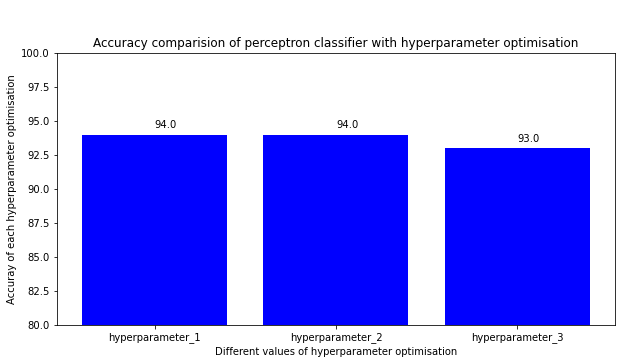

In [57]:
#graph
plt.figure(figsize=(10,5))
def addtext(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]+0.5,y[i])
plt.ylim(80,100)
y_axis = [accuracy_p1,accuracy_p2,accuracy_p3]
x_axis = ['hyperparameter_1','hyperparameter_2','hyperparameter_3']
addtext(x_axis,y_axis)
plt.bar(x_axis,y_axis,color=['blue', 'blue','blue'])
plt.xlabel("Different values of hyperparameter optimisation")
plt.ylabel("Accuray of each hyperparameter optimisation")
plt.title('\n\nAccuracy comparision of perceptron classifier with hyperparameter optimisation')

plt.show()

# KNeighborsClassifier with hyperparameter optimisation using 10-fold cross validation

In [58]:
#1 Assigning different values for hyperparameters
clf_3 = KNeighborsClassifier()
grid_param_knn = {
    'n_neighbors': [5],
    'weights': ['uniform'],
    'algorithm': ['auto','ball_tree']
}

In [59]:
#grid search 10-fold cross-validation to tune the hyperparameters of the KNeighbors
grid_search_3 = GridSearchCV(estimator=clf_3,
                     param_grid=grid_param_knn,
                     scoring='accuracy',
                     cv=10,
                     n_jobs=-1)

In [60]:
#fit the model
grid_search_3.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree'], 'n_neighbors': [5],
                         'weights': ['uniform']},
             scoring='accuracy')

In [61]:
best_hyper_parameters = grid_search_3.best_params_


In [62]:
accuracy_kn1 = round(grid_search_3.best_score_,2) * 100
#print("Accuracy_kn1:",accuracy_kn1)


In [63]:
# Displays best_hyper_parameter and classification report
print("Hyperparameter:\n",best_hyper_parameters)
print("\n\nClassification_report KNeighborsClassifier-hyperparameter_1:\n",classification_report(y_test,grid_search_3.best_estimator_.predict(x_test)))

Hyperparameter:
 {'algorithm': 'ball_tree', 'n_neighbors': 5, 'weights': 'uniform'}


Classification_report KNeighborsClassifier-hyperparameter_1:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97      4441
           1       0.96      0.97      0.97      4359

    accuracy                           0.97      8800
   macro avg       0.97      0.97      0.97      8800
weighted avg       0.97      0.97      0.97      8800



In [64]:
#2 Assigning different values for hyperparameters

grid_param_knn = {
    'n_neighbors': [10],
    'weights': ['uniform'],
    'algorithm': ['kd_tree','brute']
}

#grid search 10-fold cross-validation to tune the hyperparameters of the KNeighbors
grid_search_3 = GridSearchCV(estimator=clf_3,
                     param_grid=grid_param_knn,
                     scoring='accuracy',
                     cv=10,
                     n_jobs=-1)
#fit the model
grid_search_3.fit(x_train, y_train)

best_hyper_parameters = grid_search_3.best_params_

accuracy_kn2 = round(grid_search_3.best_score_,2) * 100
#print("Accuracy_kn2:",accuracy_kn2)
# Displays best_hyper_parameter and classification report
print("Hyperparameter:\n",best_hyper_parameters)


print("\n\nClassification_report KNeighborsClassifier-hyperparameter_2:\n",classification_report(y_test,grid_search_3.best_estimator_.predict(x_test)))

Hyperparameter:
 {'algorithm': 'kd_tree', 'n_neighbors': 10, 'weights': 'uniform'}


Classification_report KNeighborsClassifier-hyperparameter_2:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97      4441
           1       0.96      0.97      0.97      4359

    accuracy                           0.97      8800
   macro avg       0.97      0.97      0.97      8800
weighted avg       0.97      0.97      0.97      8800



In [65]:
#3
grid_param_knn = {
    'n_neighbors': [15,20],
    'weights': ['uniform','distance'],
    'algorithm': ['auto','ball_tree','kd_tree','brute']
}

grid_search_3 = GridSearchCV(estimator=clf_3,
                     param_grid=grid_param_knn,
                     scoring='accuracy',
                     cv=10,
                     n_jobs=-1)

grid_search_3.fit(x_train, y_train)

best_hyper_parameters = grid_search_3.best_params_


accuracy_kn3= round(grid_search_3.best_score_,2) * 100
#print("Accuracy_kn3:",accuracy_kn3)

print("Hyperparameter:\n",best_hyper_parameters)
print("\n\nClassification_report KNeighborsClassifier-hyperparameter_3:\n",classification_report(y_test,grid_search_3.best_estimator_.predict(x_test)))

Hyperparameter:
 {'algorithm': 'auto', 'n_neighbors': 15, 'weights': 'distance'}


Classification_report KNeighborsClassifier-hyperparameter_3:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97      4441
           1       0.96      0.97      0.97      4359

    accuracy                           0.97      8800
   macro avg       0.97      0.97      0.97      8800
weighted avg       0.97      0.97      0.97      8800



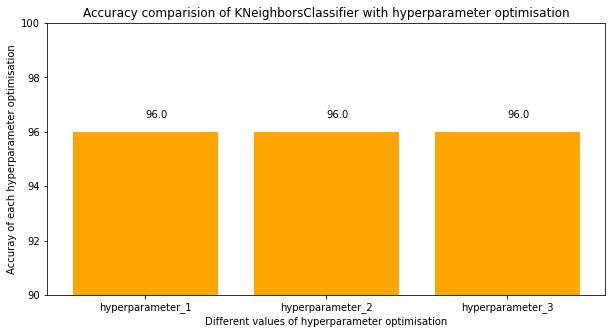

In [66]:
# Graph
plt.figure(figsize=(10,5))
def addtext(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]+0.5,y[i])
plt.ylim(90,100)
y_axis = [accuracy_kn1,accuracy_kn2,accuracy_kn3]
x_axis = ['hyperparameter_1','hyperparameter_2','hyperparameter_3']
addtext(x_axis,y_axis)
plt.bar(x_axis,y_axis,color=['orange', 'orange','orange'])
plt.xlabel("Different values of hyperparameter optimisation")
plt.ylabel("Accuray of each hyperparameter optimisation")
plt.title('Accuracy comparision of KNeighborsClassifier with hyperparameter optimisation')

plt.show()


In [69]:
# Finding mean accuracy for random forest classifier with hyperparameter optimisation 

random_forest_accuracy = np.array([accuracy_1,accuracy_2,accuracy_3]).mean()

# Finding mean accuracy for perceptron classifier with hyperparameter optimisation 
 
perceptron_accuracy = np.array([accuracy_p1,accuracy_p2,accuracy_p3]).mean()

# Finding mean accuracy for KNeighborsClassifier with hyperparameter optimisation 

KNN_accuracy = np.array([accuracy_kn1,accuracy_kn2,accuracy_kn3]).mean()
 


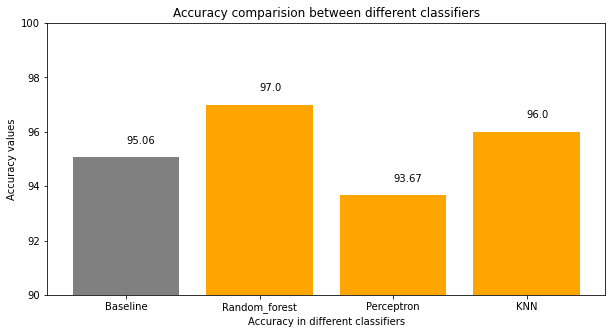

In [76]:
#Graph
plt.figure(figsize=(10,5))
def addtext(x,y):
    for i in range(len(x)):
        plt.text(i,y[i]+0.5,round(y[i],2))
plt.ylim(90,100)
y_axis = [accuracy,random_forest_accuracy,perceptron_accuracy,KNN_accuracy]
x_axis = ['Baseline','Random_forest','Perceptron','KNN']
addtext(x_axis,y_axis)
plt.bar(x_axis,y_axis,color=['grey','orange', 'orange','orange'])
plt.xlabel("Accuracy in different classifiers")
plt.ylabel("Accuracy values")
plt.title('Accuracy comparision between different classifiers')

plt.show()